# 🧩 Notebook-04: Subplots and Axes with Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
UTILS_DIR = PROJECT_ROOT / "utils"
if str(UTILS_DIR) not in sys.path:
    sys.path.insert(0, str(UTILS_DIR))

from plot_utils import grid_plot, dual_axis_plot

print("🧱 Subplots and Axes using Matplotlib\n")

🧱 Subplots and Axes using Matplotlib



In [2]:
# 🗂️ 1. Load Dataset
df = pd.read_csv(PROJECT_ROOT / "datasets" / "sales_data.csv")

/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:206: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


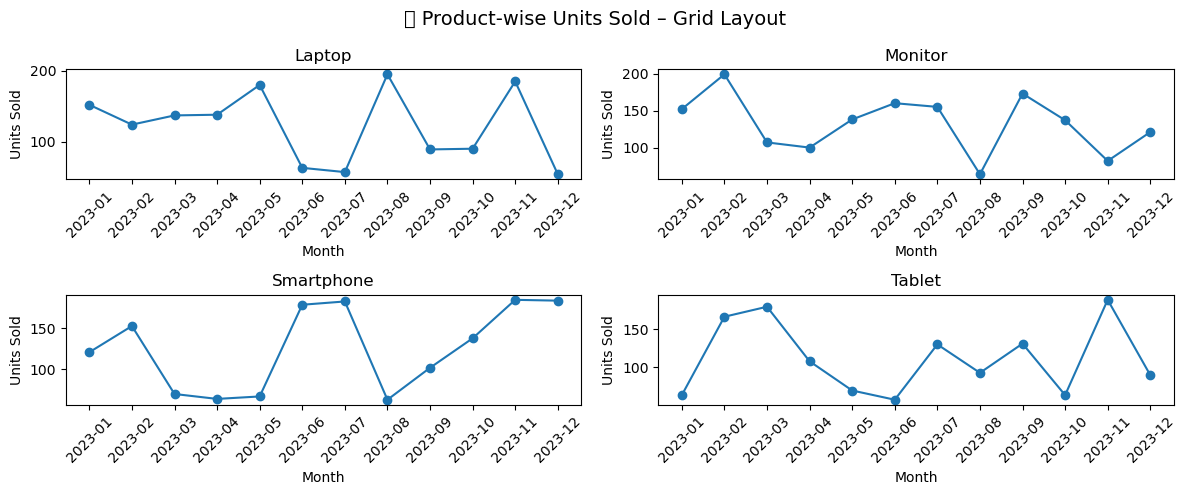

In [3]:
# 🧱 2. Grid of Subplots – One Plot per Product
monthly = df.groupby(["Month", "Product"])["Units Sold"].sum().unstack().reset_index()

def make_subplot(product):
    def plot(ax):
        ax.plot(monthly["Month"], monthly[product], marker='o')
        ax.set_xlabel("Month")
        ax.set_ylabel("Units Sold")
        ax.tick_params(axis='x', rotation=45)
    return plot

plot_funcs = [make_subplot(p) for p in monthly.columns[1:]]

grid_plot(
    plot_funcs=plot_funcs,
    titles=monthly.columns[1:].tolist(),
    nrows=2,
    ncols=2,
    suptitle="🧱 Product-wise Units Sold – Grid Layout"
)

/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:233: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/Users/satvikpraveen/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


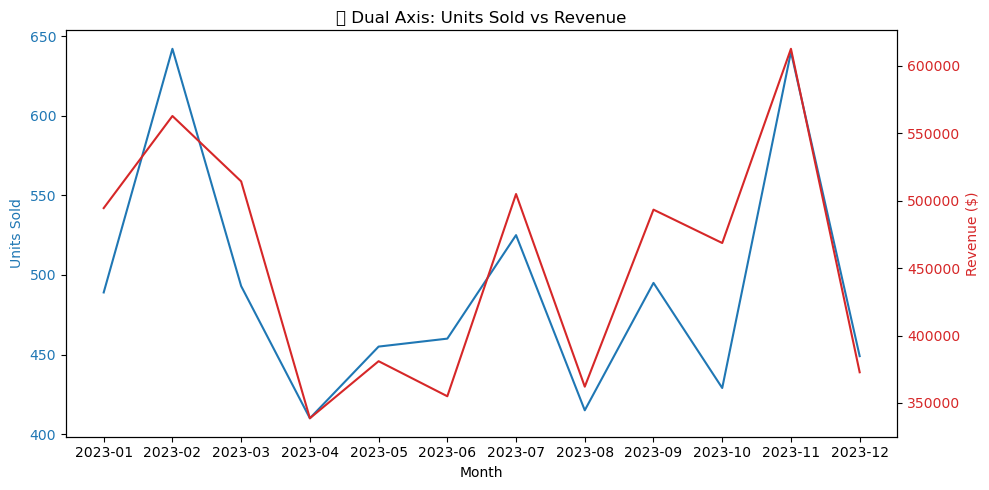

In [4]:
# 📊 3. Dual Axis Plot – Units Sold vs Revenue
monthly_rev = df.groupby("Month")[["Units Sold", "Revenue"]].sum().reset_index()

dual_axis_plot(
    x=monthly_rev["Month"],
    y1=monthly_rev["Units Sold"],
    y2=monthly_rev["Revenue"],
    label1="Units Sold",
    label2="Revenue",
    xlabel="Month",
    ylabel1="Units Sold",
    ylabel2="Revenue ($)",
    title="📊 Dual Axis: Units Sold vs Revenue"
)


## ✅ Summary
- ✅ Created grid of subplots using reusable `grid_plot()`
- ✅ Each subplot represents monthly units for a product
- ✅ Used `dual_axis_plot()` for comparing two trends on different scales